In [67]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# note: if it says error 'No module named 'langdetect'', run 'pipinstall langdetect' to install 
from langdetect import detect
# For deleting punctuation
import re
import string
# For removing stopwords
from nltk import word_tokenize
from nltk.corpus import stopwords

In [43]:
# reads in each csv datasets as a pandas dataframe
def read_data(file):
    # Broadening possible missing values
    missing_values = ["n/a", "na", "--", "-", "NaN", "N/A", 'no title', ""] 
    read_file = pd.read_csv(file, index_col = False, delimiter = ',', header=0, na_values = missing_values)
    
    return read_file

PATH = "/content/drive/My Drive/Data/"

# create dataframes and keep only necessary features to join dataframes
fake_news1_labelled = read_data(PATH + "train.csv").loc[:,["title", "text", "label"]]
fake_news1_test = read_data(PATH + "test.csv")
fake_news1_testlabels = read_data(PATH + "submit.csv")
fake_news2 = read_data(PATH + "fake.csv").loc[:,["title", "text", "language"]]
politifact_real = read_data(PATH + "PolitiFact_real_news_content.csv").loc[:,["title", "text"]]
politifact_fake = read_data(PATH + "PolitiFact_fake_news_content.csv").loc[:,["title", "text"]]
buzzfeed_real = read_data(PATH + "BuzzFeed_real_news_content.csv").loc[:,["title", "text"]]
buzzfeed_fake = read_data(PATH + "BuzzFeed_fake_news_content.csv").loc[:,["title", "text"]]
news_labelled = read_data(PATH + "news_articles.csv").loc[:,["title", "text", "language", "label"]]
signal_sample = read_data(PATH + "signal_sample.csv")

In [44]:
# merge test data with their labels
fake_news1_test_labelled = fake_news1_test.merge(fake_news1_testlabels, on = "id").loc[:,["title", "text", "label"]]

In [45]:
# remove instances that are not in engilsh
def remove_non_english(df):
    
    df = df[df.language == "english"]
    
    return df

fake_news2_update = remove_non_english(fake_news2).loc[:,["title", "text"]]
news_labelled_update = remove_non_english(news_labelled).loc[:,["title", "text", "label"]]

In [46]:
# assigns 1 (fake) as the label for all instances in the dataframe
def fake_label(fake_df):
    
    fake_df["label"] = 1
    
    return fake_df

# assigns 0 (real) as the label for all instances in the dataframe
def real_label(real_df):
    
    real_df["label"] = 0
    
    return real_df


fake_news2_labelled = fake_label(fake_news2_update)
politifact_fake_labelled = fake_label(politifact_fake)
buzzfeed_fake_labelled = fake_label(buzzfeed_fake)

politifact_real_labelled = real_label(politifact_real)
buzzfeed_real_labelled = real_label(buzzfeed_real)
signal_labelled = real_label(signal_sample)

# rename 'fake' to 1 and 'real' to 0
news_labelled_update["label"] = news_labelled_update["label"].replace({"Fake": 1, "Real": 0})

In [47]:
# rename "content" column to "text"
signal_labelled_update = signal_labelled.rename(columns = {"content":"text"}).loc[:,["title", "text", "label"]]

[Text(0, 0, 'Fake News Net'),
 Text(0, 0, 'Politifact'),
 Text(0, 0, 'Buzzfeed'),
 Text(0, 0, 'Source based'),
 Text(0, 0, 'Fake News'),
 Text(0, 0, 'Signal')]

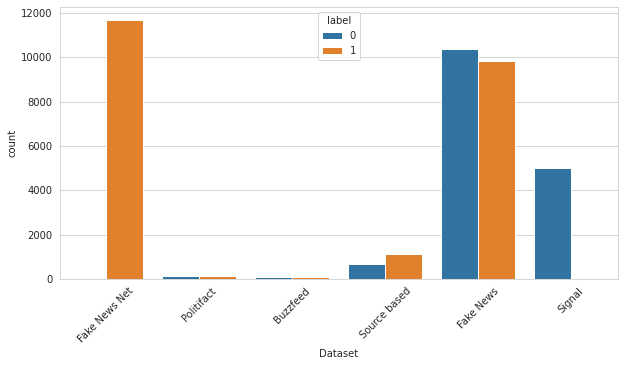

In [48]:
# Creating countplot with amount of true/false data for each dataset
# I realise that this makes the next cell block semi-redundant but I was worried to remove Lauras 
# in case I put them together wrong

# first, editing dataset to display dataset titles
politifact = pd.concat([politifact_fake_labelled, politifact_real_labelled]).reset_index().loc[:,["title", "text", "label"]]
buzzfeed = pd.concat([buzzfeed_fake_labelled, buzzfeed_real_labelled]).reset_index().loc[:,["title", "text", "label"]]
politifact['Dataset'] = 'Politifact'
buzzfeed['Dataset'] = 'Buzzfeed'
signal_labelled_update['Dataset'] = 'Signal'
fake_news2_labelled['Dataset'] = 'Fake News Net'
fake_news1_labelled['Dataset'] = 'Fake News'
news_labelled_update['Dataset'] = 'Source based'

# Creating list for df
news_df_list = [fake_news2_labelled, politifact, buzzfeed, news_labelled_update, fake_news1_labelled, 
                fake_news1_test_labelled, signal_labelled_update]

# Concatenate dataframes into one whole dataframe
all_news_labelled = pd.concat(news_df_list).reset_index().loc[:,["title", "text", "label", "Dataset"]].dropna()

# Plotting countplot with true/false for each dataste
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Dataset", hue="label", data = all_news_labelled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [49]:
# create a list of all dataframe
news_df_list = [fake_news2_labelled, politifact_fake_labelled, buzzfeed_fake_labelled, politifact_real_labelled, 
                buzzfeed_real_labelled, news_labelled_update, fake_news1_labelled, 
                fake_news1_test_labelled, signal_labelled_update]

# concatenate dataframes into one whole dataframe, removing null values and duplicates
all_news = pd.concat(news_df_list).reset_index().loc[:,["title", "text", "label"]].dropna()


In [50]:
all_news.groupby("label").count()

,title,text
label,,
0,18601,18601
1,25558,25558


In [51]:
all_news.head(10)

,title,text,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,1
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,1
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,1
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,1
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,1
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,1
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,1
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,1
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,1
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,1


In [52]:
# Removing duplicate values based on text, keeping the first instance
all_news = all_news.drop_duplicates(subset = ["title", "text"], keep='first')
all_news = all_news.drop_duplicates(subset=['text'], keep='first')

In [53]:
# Removing any instances not in English
def is_en(txt):
  '''
  Function modified from similar work by Bruno Mello on 
  https://stackoverflow.com/questions/60930935/exclude-non-english-rows-in-pandas
  '''
  try:
    return detect(txt)=='en'
  except:
    return False



def dropNonEnglish(df):
  '''
  Requires input of df (Pandas DataFrame), deletes all non-English instances, 
  displays count, and returns dataframe.
  '''
  df['isEng'] = df['title'].apply(lambda x: is_en(x))

  # Display count
  print(df.groupby(df['isEng']).count())

  # Delete those not in english
  df = df.loc[df['isEng'] == True] 

  # Returns df
  return df.drop(['isEng'], axis = 1)
  
  
# Run dataset through fn to drop non-english
all_news = dropNonEnglish(all_news)

       title   text  label
isEng                     
False   1707   1707   1707
True   30058  30058  30058


In [54]:
all_news.head()

,title,text,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,1
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,1
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,1
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,1
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,1


In [55]:
# After inspection, replacing \n with black space
all_news['text'] = all_news['text'].apply(lambda x: x.replace("\n", ""))
all_news['title'] = all_news['title'].apply(lambda x: x.replace("\n", ""))

Title Words:
Quantile  1 =  9.0
Quantile 3 =  15.0
Mean =  12.050269479007252
Median =  12.0
Inter-quartile Range =  6.0
Number of Outliers:  48 

Text Words:
Quantile  1 =  259.0
Quantile 3 =  994.0
Mean =  722.3838720426525
Median =  517.0
Inter-quartile Range =  735.0
Number of Outliers:  402 

Title Letters:
Quantile  1 =  57.0
Quantile 3 =  86.0
Mean =  72.30106727911375
Median =  73.0
Inter-quartile Range =  29.0
Number of Outliers:  49 

Text Letters:
Quantile  1 =  1548.0
Quantile 3 =  5774.5
Mean =  3967.5291112689874
Median =  3079.0
Inter-quartile Range =  4226.5
Number of Outliers:  37 



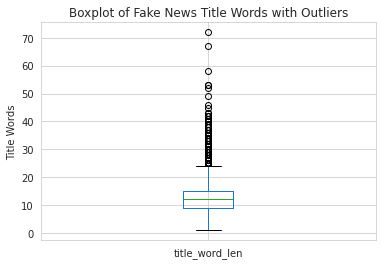

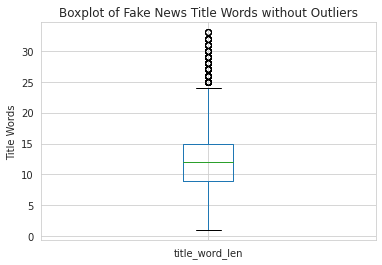

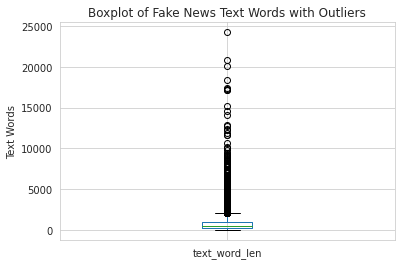

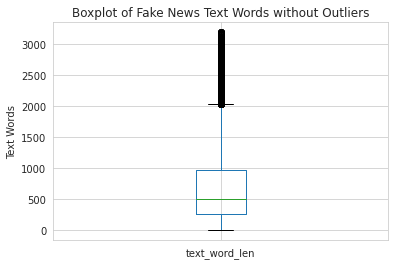

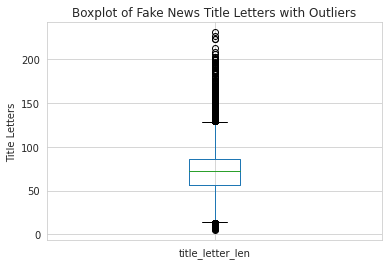

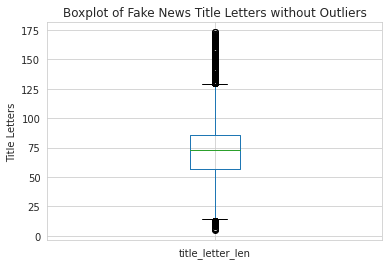

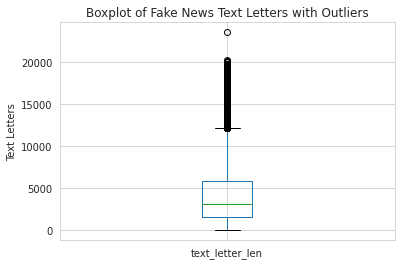

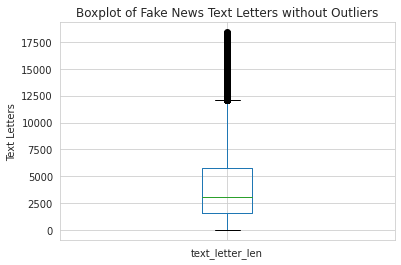

In [56]:
# Creating two functions to utilise in removing outliers from the df, 
# printing out summary stats and boxplots throughout

def removeFeatureOutliers(df, ref, name):
  '''
  Function takes input df(Pandas DataFrame), ref(String- reference to column in 
  df for outlier analysis), name(String- To display for output). 

  Function prints out out summary statistics and boxplots before and after 
  outlier removal for feature. 

  Returns dataframe with outliers removed for input feature. 
  '''
  # Define quartiles 
  q1 = df[ref].quantile(.25)
  q3 = df[ref].quantile(.75)
  iqr = q3-q1

  # Print out summary stats
  print(name + ":")
  print('Quantile  1 = ',q1)
  print('Quantile 3 = ', q3)
  print("Mean = ", df[ref].mean())
  print("Median = ", df[ref].median())
  print("Inter-quartile Range = ",iqr)

  # Define outliers
  outliers =  df[ref][(df[ref] > q3+3*iqr) | (df[ref] < q1-3*iqr)] 
  print("Number of Outliers: ", outliers.size, "\n")

  # Display boxplot with outliers
  fig, ax = plt.subplots()
  ax.set_ylabel(name)
  df[ref].plot(kind='box').set_title('Boxplot of Fake News ' + name + ' with Outliers')  

  # Removing outliers
  df = df.drop(outliers.index)

  # Re-displaying boxplot without outliers
  fig, ax = plt.subplots()
  ax.set_ylabel(name)
  df[ref].plot(kind='box').set_title('Boxplot of Fake News ' + name + ' without Outliers')

  # Returning dataFrame
  return df

def removeAllOutliers(df):
  '''
  Function takes input df(Pandas DataFrame). 

  Function creates features for word and letter lengths for title and text of 
  fake news and removes outliers for all.

  Returns dataframe with all forms of outliers removed. 
  '''
  # Defining each feature to create
  str_xw = 'text_word_len'
  str_xl = 'text_letter_len'
  str_tw = 'title_word_len'
  str_tl = 'title_letter_len'

  # Adding columns with word and letter length for title and text
  df[str_xw] = df['text'].apply(lambda x: len(x.split()))
  df[str_tw] = df['title'].apply(lambda x: len(x.split()))
  df[str_xl] = df['text'].apply(len)
  df[str_tl] = df['title'].apply(len)

  # Inputting each into fn to remove outliers
  df1 = removeFeatureOutliers(df, str_tw, "Title Words")
  df2 = removeFeatureOutliers(df1, str_xw, "Text Words")
  df3 = removeFeatureOutliers(df2, str_tl, "Title Letters")
  df4 = removeFeatureOutliers(df3, str_xl, "Text Letters")

  return df4


news_data_stats = removeAllOutliers(all_news)

In [57]:
# Visual inspection of data to see any contextual outliers
news_data_stats.describe()

,label,text_word_len,title_word_len,text_letter_len,title_letter_len
count,29522.000000,29522.000000,29522.000000,29522.000000,29522.000000
mean,0.432660,657.488280,11.978931,3948.350417,72.112594
std,0.495453,528.574591,3.948480,3146.001329,22.301598
min,0.000000,0.000000,1.000000,0.000000,5.000000
25%,0.000000,256.000000,9.000000,1545.250000,57.000000
50%,0.000000,507.000000,12.000000,3074.000000,73.000000
75%,1.000000,965.000000,15.000000,5762.750000,86.000000
max,1.000000,3194.000000,33.000000,18397.000000,173.000000


In [58]:
# Removing contextual outliers
news_data_stats = news_data_stats.loc[news_data_stats['text_word_len'] > 5]
news_data_stats = news_data_stats.loc[news_data_stats['title_letter_len'] > 2] 

In [59]:
# Removing lengths of words and letters as no longer needed for analysis
news_data = news_data_stats.drop(['text_word_len', 'title_word_len', 'title_letter_len', 'text_letter_len'], axis = 1)
print(news_data.count())

title    29488
text     29488
label    29488
dtype: int64


In [68]:
# Deleting punctuation from text

def delete_punc(text):
  '''
  Function that takes input of text (String) and removes all punctuation,
  returning a String of the input without punctuation.
  '''
  text_wo_punc = ''
  text_wo_punc = re.sub('['+string.punctuation+']', '', text)
  return text_wo_punc

# Creating a copy of data in case
data = news_data.copy()

# Deleting punctuation from text and title columns
data['text'] = data['text'].apply(lambda x: delete_punc(x))
data['title'] = data['title'].apply(lambda x: delete_punc(x))


In [69]:
# Putting text and title in lower case
data['text'] = data['text'].apply(lambda x: x.lower())
data['title'] = data['title'].apply(lambda x: x.lower())

In [70]:
# Removing stopwords from text and title columns

# Converting to tokens
tokens_text = [word_tokenize(news) for news in data.text]
tokens_title = [word_tokenize(news_title) for news_title in data.title]

# Setting stopwords to be in English
stoplist = stopwords.words('english')

def removeStopWords(tokens): 
  '''
  Function takes input of tokens (List of Strings) and removes
  any words in the list that are stop words. Return List of Strings 
  without stopwords.
  '''
  return [word for word in tokens if word not in stoplist]

filtered_words_text = [removeStopWords(news) for news in tokens_text]
data['text'] = [' '.join(news) for news in filtered_words_text]
# data['tokens'] = filtered_words

filtered_words_title = [removeStopWords(news) for news in tokens_title]
data['title'] = [' '.join(news_title) for news_title in filtered_words_title]
# data['tokens'] = filtered_words


,title,text,label
0,muslims busted stole millions gov ’ benefits,print pay back money plus interest entire fami...,1
1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1
2,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1
3,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1
4,fantastic trumps 7 point plan reform healthcar...,email healthcare reform make america great sin...,1
...,...,...,...
45834,travel deals get 1200 air credit two apt cookt...,apt offering savings new cape york outback wil...,0
45837,atlantis,week ago today september 4th robby went atlant...,0
45838,taiwanese recyclers belief waste simply mispla...,taipei taiwan sept 8 2015 prnewswire recent ye...,0
45839,season curtain raiser ideal way honour john,blackburn sunday league john haydock memorial ...,0


In [71]:
# Convert to csv
data.to_csv(r"/content/drive/My Drive/Data/final_preproccessed_data.csv", index = False, header=True)

In [72]:
# Checking csv conversion worked correctly
check = pd.read_csv(PATH + "final_preproccessed_data.csv", lineterminator='\n')
check

,title,text,label
0,muslims busted stole millions gov ’ benefits,print pay back money plus interest entire fami...,1
1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1
2,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1
3,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1
4,fantastic trumps 7 point plan reform healthcar...,email healthcare reform make america great sin...,1
...,...,...,...
29483,travel deals get 1200 air credit two apt cookt...,apt offering savings new cape york outback wil...,0
29484,atlantis,week ago today september 4th robby went atlant...,0
29485,taiwanese recyclers belief waste simply mispla...,taipei taiwan sept 8 2015 prnewswire recent ye...,0
29486,season curtain raiser ideal way honour john,blackburn sunday league john haydock memorial ...,0
